In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [3]:
print("Eğitim kümesi boyutu (X) :", x_train.shape)
print("Eğitim kümesi boyutu (y) :", y_train.shape)
print("Test kümesi boyutu (X)   :", x_test.shape)
print("Test kümesi boyutu (y)   :", y_test.shape)

Eğitim kümesi boyutu (X) : (50000, 32, 32, 3)
Eğitim kümesi boyutu (y) : (50000, 1)
Test kümesi boyutu (X)   : (10000, 32, 32, 3)
Test kümesi boyutu (y)   : (10000, 1)


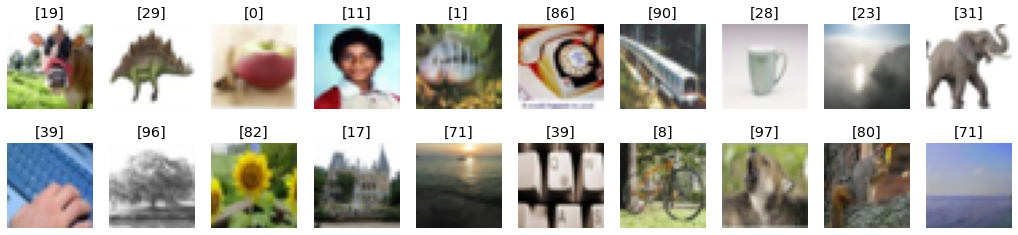

In [4]:
plt.figure(figsize=(18,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off');

In [5]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

### Model 1

In [6]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=3, activation='relu', strides=2, input_shape=(32,32,3)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 16)        448       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               360100    
Total params: 360,548
Trainable params: 360,548
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, validation_split=0.2, epochs=3, batch_size=32)

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 12s 299us/step - loss: 0.3043 - accuracy: 0.9802 - val_loss: 0.3036 - val_accuracy: 0.9802
Epoch 2/3
40000/40000 [==============================] - 12s 294us/step - loss: 0.3045 - accuracy: 0.9802 - val_loss: 0.3036 - val_accuracy: 0.9802
Epoch 3/3
40000/40000 [==============================] - 12s 294us/step - loss: 0.3045 - accuracy: 0.9802 - val_loss: 0.3036 - val_accuracy: 0.9802


In [8]:
model.evaluate(x_test, y_test_cat)

10000/10000 [==============================] - 1s 72us/step


[0.3036744381427765, 0.9801995158195496]

### Model 2

In [9]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=5, activation='relu', strides=2, input_shape=(32,32,3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, validation_split=0.2, epochs=3, batch_size=32, verbose=0)
model.evaluate(x_test, y_test_cat)

10000/10000 [==============================] - 1s 78us/step


[0.3036744383335114, 0.9801996946334839]

### Model 3

In [10]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=5, activation='relu', strides=2, input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, validation_split=0.2, epochs=3, batch_size=32, verbose=0)
model.evaluate(x_test, y_test_cat)

10000/10000 [==============================] - 1s 90us/step


[0.041844791281223294, 0.9903344511985779]